In [12]:
!pip install tensorflow

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\9a\1e\7a\456008eb5e47fd5de792c6139df6d5b3d5f71d51c6a0b94799
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\59\38\c6\234dc39b4f6951a0768fbc02d5b7207137a5b1d9094f0d54bf
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py gast termcolor


In [14]:
!pip install -U imbalanced-learn

In [311]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

In [312]:
import pandas as pd
import numpy as np


In [313]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [314]:
dt = pd.read_csv('../train.csv' , encoding='big5')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [315]:
dt = dt.drop("CUS_ID" ,axis=1)

In [316]:
ohi = pd.get_dummies(dt["GENDER"])
ohi
dt = dt.drop("GENDER",axis=1)
dt = pd.concat([ohi,dt],axis=1)

In [317]:
sizemap = {
    "低":1,
    "中":2,
    "中高":3,
    "高":4
}

dt["AGE"] = dt["AGE"].map(sizemap)
dt

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,0,1,1,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,0,1,1,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,0,1,1,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,0,1,1,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,0,1,1,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,0,1,1,A1,A1,NaN,0.0,Y,0,N,...,0.000243,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,0,1,1,A1,A1,NaN,0.0,N,0,N,...,0.002600,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,0,1,1,A1,A1,NaN,0.0,Y,0,N,...,0.002887,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,0,1,1,A1,A1,1.0,0.0,N,0,N,...,0.000140,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,0,1,1,A1,A1,NaN,0.0,N,0,N,...,0.000182,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [318]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in dt.keys():    
    for a in dt[i]:
        if  a is not None and isinstance(a,str):
            dt[i] = labelencoder.fit_transform(dt[i].astype(str))
            break
#         if(not(a.isnull())):            
#             print(type(a)) 

In [319]:
for i in dt.keys():
    dt[i] = dt[i].fillna(dt[i].mean())

In [320]:
dt

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0.000174,2,2,2,2,2,2,2,2,0
1,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0.008724,0,2,2,2,2,2,2,2,0
2,0,1,1,0,0,1.000000,0.000000,1,1,1,...,0.005359,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
4,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0.000603,2,2,2,2,2,2,2,2,0
5,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.000243,2,2,2,2,2,2,2,2,0
6,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0.002600,0,2,2,2,2,2,2,2,0
7,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.002887,0,2,2,2,2,2,2,2,0
8,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0.000140,2,2,2,2,2,2,2,2,0
9,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0.000182,2,2,2,2,2,2,2,2,0


In [321]:
dt

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0.000174,2,2,2,2,2,2,2,2,0
1,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0.008724,0,2,2,2,2,2,2,2,0
2,0,1,1,0,0,1.000000,0.000000,1,1,1,...,0.005359,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
4,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0.000603,2,2,2,2,2,2,2,2,0
5,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.000243,2,2,2,2,2,2,2,2,0
6,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0.002600,0,2,2,2,2,2,2,2,0
7,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0.002887,0,2,2,2,2,2,2,2,0
8,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0.000140,2,2,2,2,2,2,2,2,0
9,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0.000182,2,2,2,2,2,2,2,2,0


In [286]:
from sklearn import  ensemble, preprocessing, metrics
# from sklearn.model_selection import cross_validation
from sklearn.model_selection import train_test_split

tran_y = dt['Y1']
dt = dt.drop('Y1',axis=1)
# tran_x = dt[['CUS_ID','GENDER','AGE','CHARGE_CITY_CD','CONTACT_CITY_CD']]
# dt.drop(['CUS_ID','L1YR_C_CNT','A_IND','B_IND','C_IND','FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G'] ,axis=1,inplace=True)
# dt.drop(['CUS_ID','EDUCATION_CD','APC_1ST_AGE','APC_1ST_YEARDIF','RFM_R','REBUY_TIMES_CNT','LEVEL','RFM_M_LEVEL','ANNUAL_PREMIUM_AMT','ANNUAL_INCOME_AMT','A_IND','B_IND','C_IND','L1YR_C_CNT','TERMINATION_RATE','DIEBENEFIT_AMT','DIEACCIDENT_AMT','POLICY_VALUE_AMT','ANNUITY_AMT','EXPIRATION_AMT','ACCIDENT_HOSPITAL_REC_AMT','DISEASES_HOSPITAL_REC_AMT','OUTPATIENT_SURGERY_AMT','INPATIENT_SURGERY_AMT','PAY_LIMIT_MED_MISC_AMT','FIRST_CANCER_AMT','ILL_ACCELERATION_AMT','ILL_ADDITIONAL_AMT','LONG_TERM_CARE_AMT','MONTHLY_CARE_AMT','IF_ISSUE_INSD_A_IND','IF_ISSUE_INSD_B_IND','IF_ISSUE_INSD_C_IND','IF_ISSUE_INSD_D_IND','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_F_IND','IF_ISSUE_INSD_G_IND','IF_ISSUE_INSD_H_IND','IF_ISSUE_INSD_I_IND','IF_ISSUE_INSD_J_IND','IF_ISSUE_INSD_K_IND','IF_ISSUE_INSD_L_IND','IF_ISSUE_INSD_M_IND','IF_ISSUE_INSD_N_IND','IF_ISSUE_INSD_O_IND','IF_ISSUE_INSD_P_IND','IF_ISSUE_INSD_Q_IND','IF_ADD_INSD_F_IND','IF_ADD_INSD_L_IND','IF_ADD_INSD_Q_IND','IF_ADD_INSD_G_IND','IF_ADD_INSD_R_IND','FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G'],axis =1 , inplace=True)
# tran_x = dt[dt.keys()[:35]] #50.48%
# tran_x = dt[dt.keys()[:30]] #50.48%
tran_x = dt #50.24%



In [289]:
tran_x

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,IF_ADD_INSD_IND,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G
0,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0,0.000174,2,2,2,2,2,2,2,2
1,0,1,1,0,0,2.169075,0.315289,1,0,0,...,0,0.008724,0,2,2,2,2,2,2,2
2,0,1,1,0,0,1.000000,0.000000,1,1,1,...,0,0.005359,0,1,0,0,0,0,0,0
3,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0,0.000000,2,2,2,2,2,2,2,2
4,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0,0.000603,2,2,2,2,2,2,2,2
5,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0,0.000243,2,2,2,2,2,2,2,2
6,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0,0.002600,0,2,2,2,2,2,2,2
7,0,1,1,0,0,2.169075,0.000000,1,0,0,...,0,0.002887,0,2,2,2,2,2,2,2
8,0,1,1,0,0,1.000000,0.000000,0,0,0,...,0,0.000140,2,2,2,2,2,2,2,2
9,0,1,1,0,0,2.169075,0.000000,0,0,0,...,0,0.000182,2,2,2,2,2,2,2,2


In [287]:
train_X, test_X, train_y, test_y = train_test_split(tran_x, tran_y, test_size = 0.33)

forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)

In [288]:
test_y_predicted = forest.predict(test_X)

# 績效
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.5022495260117062


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = dt.drop("Y1", axis =1 )
y = dt["Y1"]
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [10772 10783 10814 ... 99997 99998 99999] Test: [    0     1     2 ... 20342 20343 20344]
Train: [    0     1     2 ... 99997 99998 99999] Test: [10772 10783 10814 ... 40002 40003 40004]
Train: [    0     1     2 ... 99997 99998 99999] Test: [35617 35699 35761 ... 62267 62268 62278]
Train: [    0     1     2 ... 99997 99998 99999] Test: [59916 59917 59918 ... 80042 80043 80044]
Train: [    0     1     2 ... 80042 80043 80044] Test: [78032 78119 78217 ... 99997 99998 99999]
Label Distributions: 

[0.98 0.02]
[0.98 0.02]


In [322]:
dt = dt.sample(frac = 1)

fraud_dt = dt.loc[dt['Y1'] == 1]
non_fraud_dt = dt.loc[dt['Y1'] == 0][:2000]

normal_distributed_dt = pd.concat([fraud_dt, non_fraud_dt])

new_dt = normal_distributed_dt.sample(frac=1, random_state=42)

new_dt.head()

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
70858,0,1,3,4,4,3.000000,1.000000,1,0,0,...,0.001058,4,2,2,2,2,2,2,2,1
35423,1,0,1,2,1,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
2676,1,0,2,2,2,2.169075,0.000000,1,0,0,...,0.000000,5,2,2,2,2,2,2,2,1
96670,1,0,3,2,1,2.169075,1.000000,0,0,0,...,0.000000,7,2,2,2,2,2,2,2,0
87541,0,1,4,3,3,2.169075,0.315289,0,0,0,...,0.000000,7,2,2,2,2,2,2,2,0


In [324]:
new_dt

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
70858,0,1,3,4,4,3.000000,1.000000,1,0,0,...,0.001058,4,2,2,2,2,2,2,2,1
35423,1,0,1,2,1,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
2676,1,0,2,2,2,2.169075,0.000000,1,0,0,...,0.000000,5,2,2,2,2,2,2,2,1
96670,1,0,3,2,1,2.169075,1.000000,0,0,0,...,0.000000,7,2,2,2,2,2,2,2,0
87541,0,1,4,3,3,2.169075,0.315289,0,0,0,...,0.000000,7,2,2,2,2,2,2,2,0
17031,0,1,3,4,4,2.000000,0.000000,1,0,0,...,0.000000,7,0,0,1,0,0,0,0,1
62070,0,1,2,5,5,2.000000,1.000000,0,0,0,...,0.000000,5,2,2,2,2,2,2,2,1
3603,1,0,2,5,5,3.000000,0.000000,1,0,1,...,0.005926,0,1,0,0,0,0,0,0,1
1561,0,1,2,4,4,4.000000,1.000000,1,0,0,...,0.000899,6,1,0,0,0,0,0,0,1
13986,1,0,2,4,4,1.000000,0.000000,1,0,0,...,0.001025,3,1,0,0,0,0,0,0,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Y1, dtype: float64


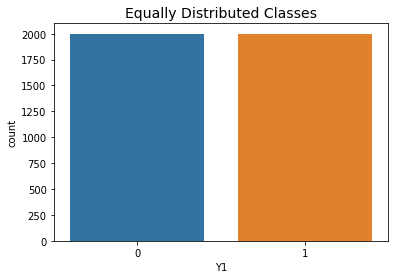

In [323]:
print('Distribution of the Classes in the subsample dataset')
print(new_dt['Y1'].value_counts()/len(new_dt))

sns.countplot('Y1', data=new_dt)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [325]:
x = new_dt.drop("Y1",axis=1)
y = new_dt["Y1"]
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.33)

forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)


In [309]:
x1 = dt.drop("Y1",axis=1)
y1 = dt["Y1"]
train_X, test_X, train_y, test_y = train_test_split(x1, y1, test_size = 0.33)

forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)


In [327]:
tx = dt.drop("Y1",axis=1)
ty = dt["Y1"]

test_y_predicted = forest.predict(tx)

# 績效
fpr, tpr, thresholds = metrics.roc_curve(ty, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8244132653061224


In [328]:
dt

,F,M,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
56125,1,0,2,2,3,1.000000,0.000000,0,0,0,...,0.000000,2,1,0,0,0,0,0,0,0
35882,1,0,1,2,1,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
58413,1,0,2,2,5,2.169075,0.000000,0,0,0,...,0.000000,5,2,2,2,2,2,2,2,0
16774,1,0,3,3,3,3.000000,1.000000,1,0,0,...,0.000789,6,2,2,2,2,2,2,2,0
48613,1,0,2,2,4,3.000000,0.000000,0,0,0,...,0.000000,5,2,2,2,2,2,2,2,0
31390,0,1,1,2,2,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
41973,1,0,1,2,3,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
39094,1,0,1,2,3,1.000000,0.000000,0,0,0,...,0.000000,2,2,2,2,2,2,2,2,0
20799,1,0,3,4,4,2.000000,1.000000,1,0,1,...,0.000300,6,1,0,0,0,0,0,0,0
86641,1,0,4,0,0,2.169075,1.000000,1,0,0,...,0.000882,6,2,2,2,2,2,2,2,0


In [310]:
test_y_predicted = forest.predict(x1)

# 績效
fpr, tpr, thresholds = metrics.roc_curve(y1, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8329795918367346


GENDER
AGE
CHARGE_CITY_CD
CONTACT_CITY_CD
EDUCATION_CD
MARRIAGE_CD
LAST_A_CCONTACT_DT
L1YR_A_ISSUE_CNT
LAST_A_ISSUE_DT
L1YR_B_ISSUE_CNT


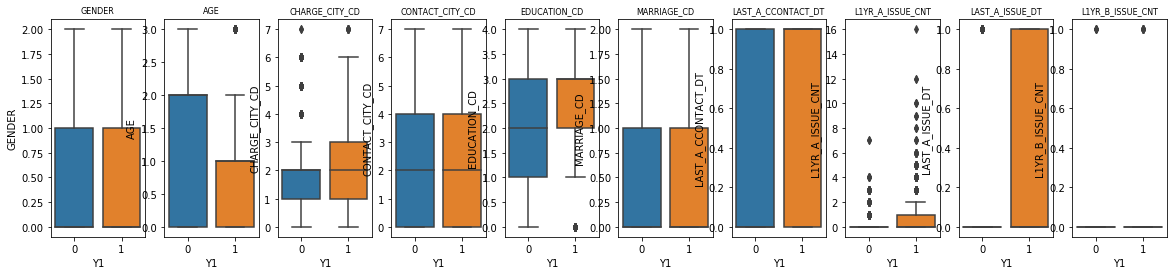

In [127]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[:10]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    print(i)
    x= x+1
plt.show()

In [128]:
std = new_dt.drop("L1YR_B_ISSUE_CNT" ,axis=1)

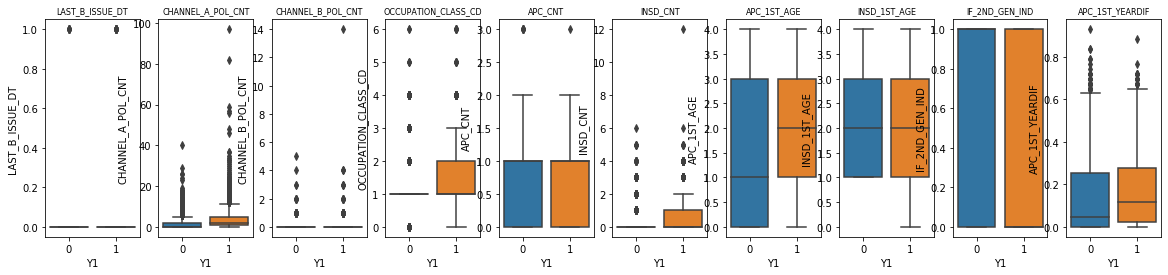

In [103]:


f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[10:20]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

RFM_R
REBUY_TIMES_CNT
LEVEL
RFM_M_LEVEL
LIFE_CNT
IF_ISSUE_A_IND
IF_ISSUE_B_IND
IF_ISSUE_C_IND
IF_ISSUE_D_IND
IF_ISSUE_E_IND


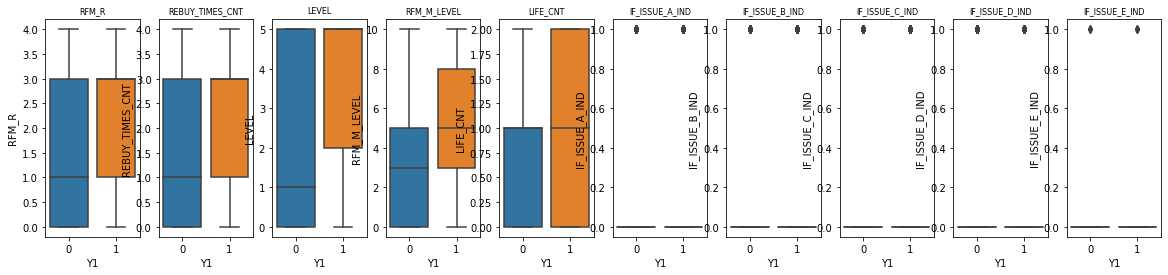

In [129]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[20:30]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    print(i)
    x= x+1
plt.show()

IF_ISSUE_F_IND
IF_ISSUE_G_IND
IF_ISSUE_H_IND
IF_ISSUE_I_IND
IF_ISSUE_J_IND
IF_ISSUE_K_IND
IF_ISSUE_L_IND
IF_ISSUE_M_IND
IF_ISSUE_N_IND
IF_ISSUE_O_IND


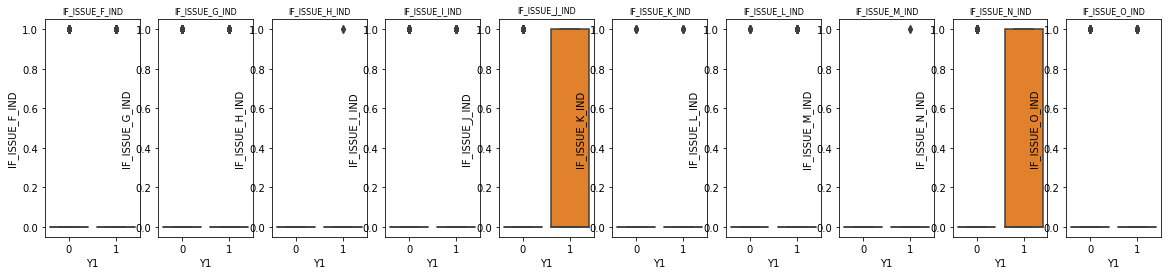

In [125]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[30:40]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
    print(i)
plt.show()


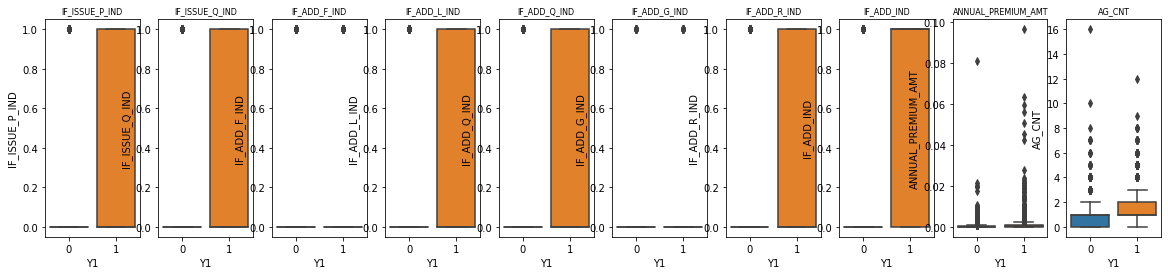

In [106]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[40:50]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

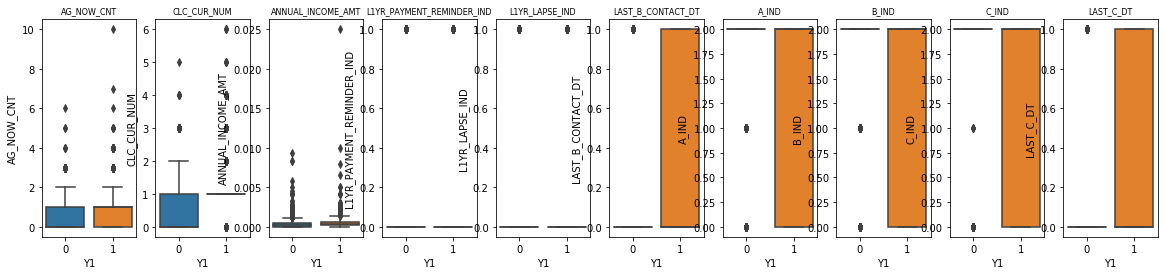

In [107]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[50:60]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

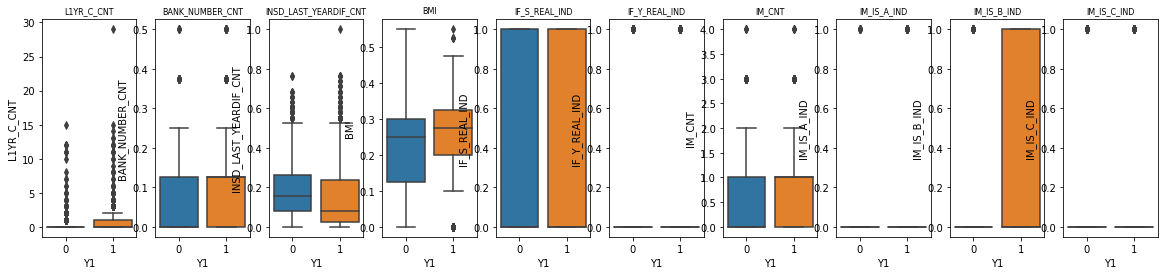

In [108]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[60:70]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

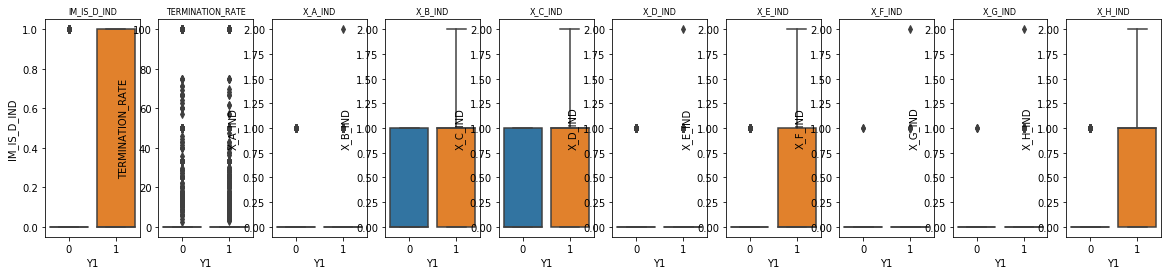

In [109]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[70:80]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

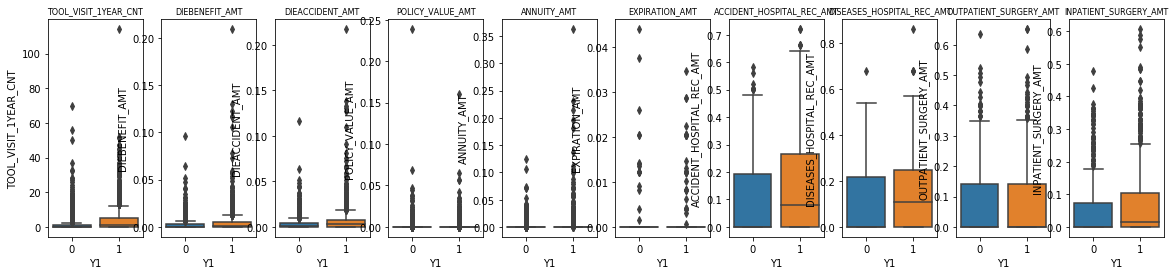

In [110]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[80:90]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

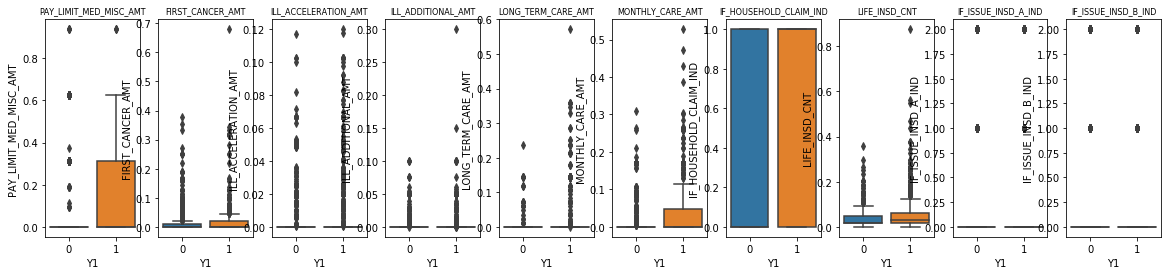

In [111]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[90:100]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

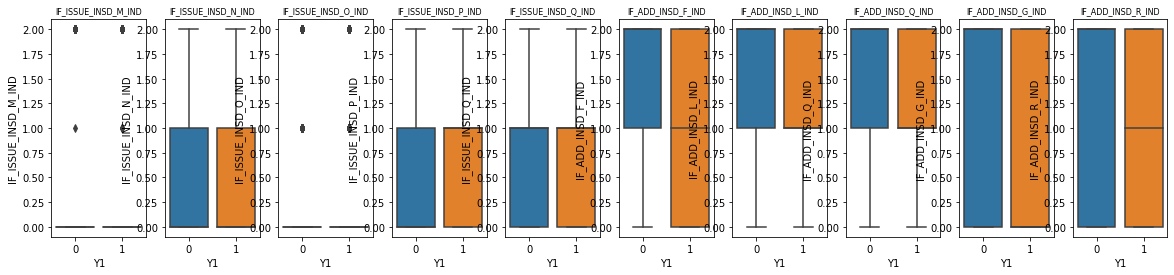

In [112]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[110:120]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()

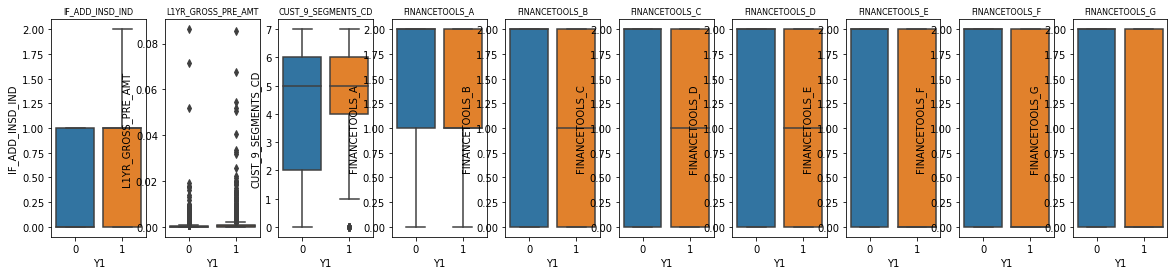

In [113]:
f, axes = plt.subplots(ncols=10, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
x=0
for i in new_dt.keys()[120:130]:
    sns.boxplot(x="Y1", y= i , data=new_dt, ax=axes[x])
    axes[x].set_title(i , fontsize=8)
    x= x+1
plt.show()